# Prepare data for the pipeline

In [2]:
%%capture
import nbimporter
import pandas as pd
from utils import TrainingSet, DataCleaner, CategoricalData
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/housing/housing.csv')
dt = TrainingSet(df, test_size=0.25)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
Tr, Xr = dt.random_test()
Th, Xh = dt.hash_test()
Ts, Xs = dt.stratified_test(column='median_house_value', strata=5)

In [7]:
print (Xr.shape, Xh.shape, Xs.shape)

(5160, 10) (5219, 10) (5160, 10)


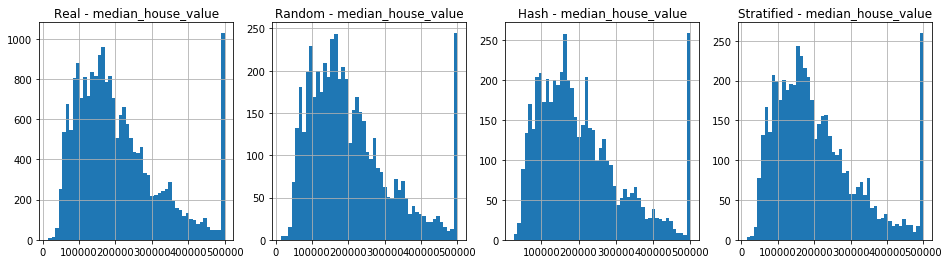

In [10]:
column = 'median_house_value'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
df[column].hist(bins=50, ax=axes[0])
axes[0].set_title('Real - {}'.format(column))
Xr[column].hist(bins=50, ax=axes[1])
axes[1].set_title('Random - {}'.format(column))
Xh[column].hist(bins=50, ax=axes[2])
axes[2].set_title('Hash - {}'.format(column))
Xs[column].hist(bins=50, ax=axes[3])
axes[3].set_title('Stratified - {}'.format(column))
plt.show()

## Separate training attributes from target labels

In [11]:
X, L = TrainingSet.training_labels(Ts, ['median_house_value'])

In [17]:
X.total_bedrooms.isnull().sum()

143

In [13]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16822,-122.53,37.65,20.0,4582.0,1124.0,2325.0,1040.0,4.0556,NEAR OCEAN
1733,-122.35,37.97,43.0,2178.0,482.0,1545.0,471.0,2.5863,NEAR BAY
1326,-121.89,38.02,36.0,2707.0,550.0,1827.0,545.0,3.3371,INLAND
6646,-118.13,34.17,49.0,1962.0,435.0,1329.0,457.0,3.2898,<1H OCEAN
18330,-122.14,37.45,48.0,2074.0,297.0,700.0,279.0,8.7051,NEAR BAY


## Data cleaning

In [18]:
cleaner = DataCleaner(text_attributes=['ocean_proximity'])

In [19]:
Xc = cleaner.fit_transform(X)

In [20]:
Xc.total_bedrooms.isnull().sum()

0

In [21]:
Xc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16822,-122.53,37.65,20.0,4582.0,1124.0,2325.0,1040.0,4.0556,NEAR OCEAN
1733,-122.35,37.97,43.0,2178.0,482.0,1545.0,471.0,2.5863,NEAR BAY
1326,-121.89,38.02,36.0,2707.0,550.0,1827.0,545.0,3.3371,INLAND
6646,-118.13,34.17,49.0,1962.0,435.0,1329.0,457.0,3.2898,<1H OCEAN
18330,-122.14,37.45,48.0,2074.0,297.0,700.0,279.0,8.7051,NEAR BAY


## Text and categorical attributes

In [22]:
cat = CategoricalData(text_attribute='ocean_proximity')

In [23]:
Xk = cat.fit_transform(Xc)

In [24]:
Xk.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16822,-122.53,37.65,20.0,4582.0,1124.0,2325.0,1040.0,4.0556,0,0,0,0,1
1733,-122.35,37.97,43.0,2178.0,482.0,1545.0,471.0,2.5863,0,0,0,1,0
1326,-121.89,38.02,36.0,2707.0,550.0,1827.0,545.0,3.3371,0,1,0,0,0
6646,-118.13,34.17,49.0,1962.0,435.0,1329.0,457.0,3.2898,1,0,0,0,0
18330,-122.14,37.45,48.0,2074.0,297.0,700.0,279.0,8.7051,0,0,0,1,0
